In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, classification_report

In [4]:
df = pd.read_csv("top_insta_influencers_data.csv")

print("Dataset Loaded Successfully")
print(df.head())
print("Shape:", df.shape)


Dataset Loaded Successfully
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  
Shape: (200, 10)


In [5]:
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB
None

Missing Values:
rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dty

In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert text values (k, m, b, %) to numeric
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}

cols_to_convert = [
    'posts',
    'followers',
    'avg_likes',
    '60_day_eng_rate',
    'new_post_avg_like',
    'total_likes'
]

df[cols_to_convert] = df[cols_to_convert].replace(
    replace, regex=True
).astype(float)

# Fill missing country values
df['country'].fillna(df['country'].mode()[0], inplace=True)

print("\nData Cleaning Completed")



Data Cleaning Completed


C:\Users\khorg\AppData\Local\Temp\ipykernel_3892\450629265.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


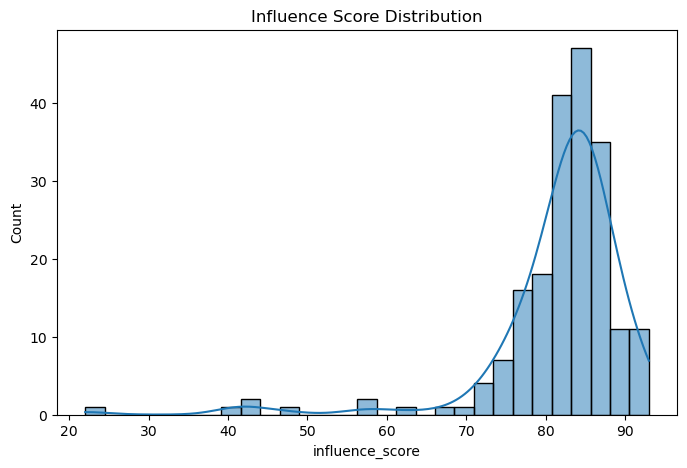

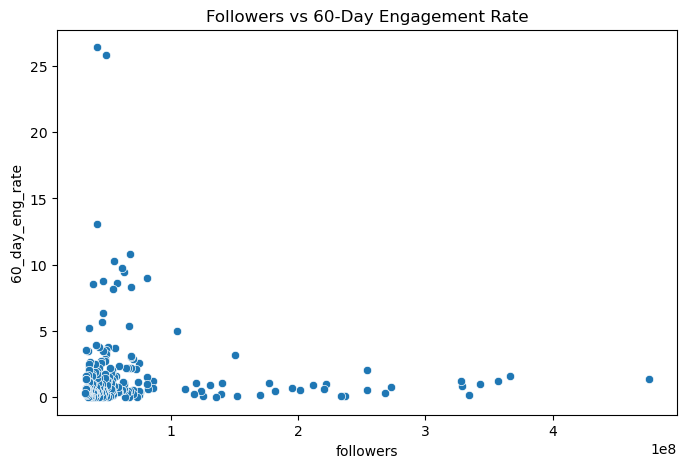

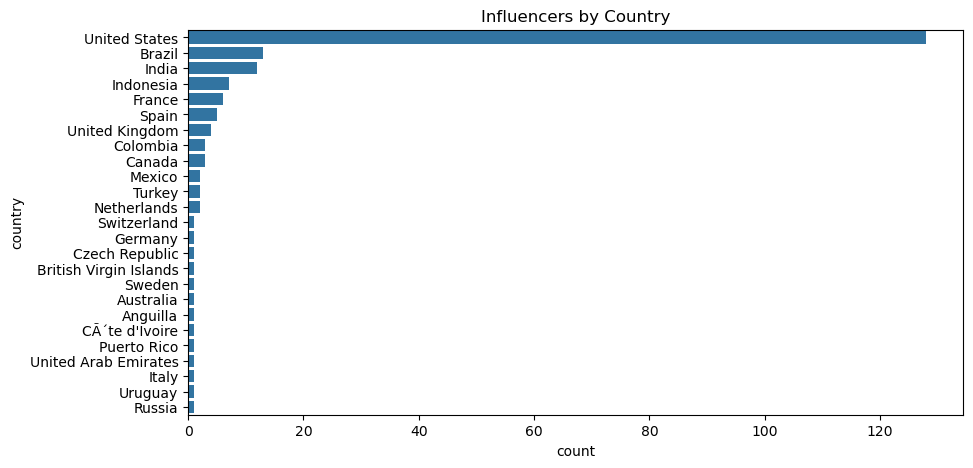

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['influence_score'], kde=True)
plt.title("Influence Score Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='followers', y='60_day_eng_rate', data=df)
plt.title("Followers vs 60-Day Engagement Rate")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index)
plt.title("Influencers by Country")
plt.show()

In [8]:
df['like_follower_ratio'] = df['total_likes'] / df['followers']
df['post_follower_ratio'] = df['posts'] / df['followers']

print("\nFeature Engineering Done")


Feature Engineering Done


In [10]:
X = df[
    ['followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']
]
y = df['influence_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

print("\nRegression R2 Score:", r2_score(y_test, y_pred))


Regression R2 Score: -0.059783284228737577


In [13]:
df.isna().sum()


rank                   0
channel_info           0
influence_score        0
posts                  0
followers              0
avg_likes              0
60_day_eng_rate        1
new_post_avg_like      0
total_likes            0
country                0
like_follower_ratio    0
post_follower_ratio    0
engagement_class       1
country_encoded        0
dtype: int64

In [14]:
# Drop rows with missing critical values
df = df.dropna(subset=[
    '60_day_eng_rate',
    'followers',
    'influence_score',
    'country'
])


In [15]:
bins = [0, 1, 3, df['60_day_eng_rate'].max()]
labels = ['Low', 'Medium', 'High']

df['engagement_class'] = pd.cut(
    df['60_day_eng_rate'],
    bins=bins,
    labels=labels,
    include_lowest=True
)


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['country_encoded'] = encoder.fit_transform(df['country'])


In [17]:
X = df[['followers', 'influence_score', 'country_encoded']]
y = df['engagement_class']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
y_pred = clf.predict(X_test)

print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Accuracy: 0.55

Classification Report:

              precision    recall  f1-score   support

        High       0.33      0.33      0.33         6
         Low       0.54      0.83      0.65        18
      Medium       0.83      0.31      0.45        16

    accuracy                           0.55        40
   macro avg       0.57      0.49      0.48        40
weighted avg       0.62      0.55      0.53        40



In [24]:
# Create engagement classes
bins = [0, 1, 3, df['60_day_eng_rate'].max()]
labels = ['Low', 'Medium', 'High']

df['engagement_class'] = pd.cut(
    df['60_day_eng_rate'], bins=bins, labels=labels
)

# Encode country
encoder = LabelEncoder()
df['country_encoded'] = encoder.fit_transform(df['country'])

X = df[['followers', 'influence_score', 'country_encoded']]
y = df['engagement_class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nClassification Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Accuracy: 0.55

Classification Report:

              precision    recall  f1-score   support

        High       0.33      0.33      0.33         6
         Low       0.54      0.83      0.65        18
      Medium       0.83      0.31      0.45        16

    accuracy                           0.55        40
   macro avg       0.57      0.49      0.48        40
weighted avg       0.62      0.55      0.53        40



In [25]:
print("\nTop High Engagement Influencers:")
print(
    df[df['engagement_class'] == 'High']
    [['channel_info', 'followers', '60_day_eng_rate']]
    .head(10)
)

print("\nCountry-wise Average Engagement Rate:")
print(
    df.groupby('country')['60_day_eng_rate']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)



Top High Engagement Influencers:
          channel_info    followers  60_day_eng_rate
22             zendaya  150700000.0             3.17
32        billieeilish  105200000.0             5.02
38        lalalalisa_m   80900000.0             9.00
49      jennierubyjane   68900000.0             8.36
50        narendramodi   68900000.0             3.01
51          aliaabhatt   68700000.0             3.14
53      tomholland2013   67700000.0            10.83
56  bts.bighitofficial   66900000.0             5.40
64           sooyaaa__   62900000.0             9.43
69     roses_are_rosie   61800000.0             9.72

Country-wise Average Engagement Rate:
country
Uruguay           5.400000
Mexico            4.360000
CÃ´te d'Ivoire    3.820000
Australia         3.690000
India             2.368333
Canada            2.346667
United States     2.259055
Anguilla          1.760000
Netherlands       1.310000
United Kingdom    1.037500
Name: 60_day_eng_rate, dtype: float64


In [26]:
print("\nINTERNSHIP PROJECT EXECUTED SUCCESSFULLY")


INTERNSHIP PROJECT EXECUTED SUCCESSFULLY
